# Importing necessary libraries

In [9]:
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve
import pickle
from  wordcloud import WordCloud

# Reading dataset using pandas and visualization ,analysis of dataset

In [10]:
dataset = pd.read_csv('IMDB_Dataset.csv')        

In [11]:
x1 = dataset.iloc[:,0].values
y1 = dataset.iloc[:,1].values


In [12]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
dataset.shape

(50000, 2)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null object
dtypes: object(2)
memory usage: 781.4+ KB


In [15]:
dataset.columns

Index(['review', 'sentiment'], dtype='object')

In [16]:
print(x1[:1])
print(type(x1))

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [17]:
print(y1[:20])
np.unique(y1)


['positive' 'positive' 'positive' 'negative' 'positive' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative' 'positive' 'negative'
 'positive' 'negative']


array(['negative', 'positive'], dtype=object)

In [18]:
unique_labels,counts = np.unique(y1,return_counts = True)
print(counts)

[25000 25000]


In [19]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [20]:
dg = dataset.groupby('sentiment',sort = False)

dg.first()

,review
sentiment,
positive,One of the other reviewers has mentioned that ...
negative,Basically there's a family where a little boy ...


In [21]:
dg.get_group('positive').head(10)

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
5,"Probably my all-time favorite movie, a story o..."
6,I sure would like to see a resurrection of a u...
9,If you like original gut wrenching laughter yo...
14,This a fantastic movie of three prisoners who ...
16,Some films just simply should not be remade. T...
18,"I remember this film,it was the first film i h..."


In [22]:
word_count = dataset['review'].str.contains('original').sum()
print(word_count)

5171


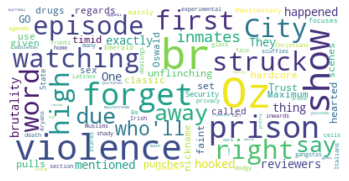

In [23]:

text = dataset.review[0]
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()   

# Cleaning dataset for Feature Extraction.

In [4]:
corpus = []                                                      #Creating An empty list.
for i in range(0,20000):                                            #Using only 20k reviews because it take lot of time.
    review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])      #Keeping Alphabets and removing punctuation  
    review = review.lower()                                      #converting to lower case
    review = review.split()                                      #tokenizing
    ps = PorterStemmer()                                         #stemming-reducing inflected words to their word stem
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)                                    #Removing unnecessary words and Join words to form sentence.
    corpus.append(review)                                        #Placing all the cleaned review into a list.


"""pickle_in = open("corpus.pickle","rb") 
corpus = pickle.load(pickle_in) """

# Feature Extraction Using CountVectorizer

In [5]:
cv = CountVectorizer(max_features=5000)        #Extraction Features from the Cleaned review to classify its as postive or negative.                       

# Identify training and test data from the featureset.

In [6]:
X = cv.fit_transform(corpus).toarray()                                        #X dataset       

y = dataset.iloc[:, 1].values

y=y[:20000]                                                                      #cosidering output of only 20k reviews from 10k

le = preprocessing.LabelEncoder()                                             # Converting catagorical data 

y = le.fit_transform(y)                                                       # y set  
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)   #spliting X and y into train and test data wih ratio of 80:20    
 

# Create and train a Machine Learning model.

In [7]:
classifier = SVC(probability=True)                                 #using svm to classify reviews
classifier.fit(X_train, y_train)                   #fitting the X_train, y_train to the model and training the model

"""pickle_in = open("classifiernew.pickle","rb") 
classifier = pickle.load(pickle_in)"""

# Validate the model created.

In [8]:
y_pred = classifier.predict(X_test)                        #useing unseen data to test the model

In [19]:
# verifying  the model performance for new reviews.
reviews = ["I love this movie","First one was much better, I had enjoyed it a lot. This one has not even produced a smile.","HIT is definitely not a film that will keep you on the edge of the seat, but it keeps you engaged enough to know more. With a tighter narrative, better direction and performances, this truly could’ve been something else. But that’s not to say, that the film doesn’t work, because it does, especially with the massive cliff-hanger at the end promising a sequel worth watching."]
i=0
for review in reviews:
    i+=1
    op=classifier.predict(cv.transform([review]).toarray())
    if op==[0] :
        print(i,") ",review,'=','negative',"\n")
    else :
        print(i,") ",review,'=','positive','\n')

1 )  I love this movie = positive 

2 )  First one was much better, I had enjoyed it a lot. This one has not even produced a smile. = negative 

3 )  HIT is definitely not a film that will keep you on the edge of the seat, but it keeps you engaged enough to know more. With a tighter narrative, better direction and performances, this truly could’ve been something else. But that’s not to say, that the film doesn’t work, because it does, especially with the massive cliff-hanger at the end promising a sequel worth watching. = positive 



# Evaluate the model

In [10]:
print('SVM-Evaluation:\n')                                 
print('Accuracy score : ',accuracy_score(y_test, y_pred)*100,'\n')      #accuracy of the model     
print(confusion_matrix(y_test,y_pred),'\n')                             #Confusion Matrix
print(classification_report(y_test,y_pred))                             #Classification Report such recall precision etc


SVM-Evaluation:

Accuracy score :  92.67999999999999 

[[2323  210]
 [ 156 2311]] 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2533
           1       0.92      0.94      0.93      2467

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



# Precision Recall curve

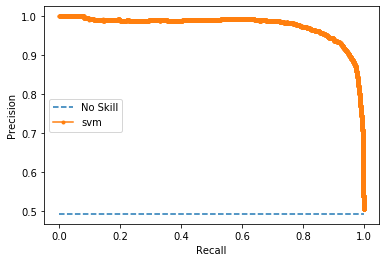

In [11]:
lr_probs = classifier.predict_proba(X_test)
                                                                           # keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
                                                                           # predict class values
yhat = classifier.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
                                                                            # plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='svm')
                                                                               # axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
                                                                                 # show the legend
pyplot.legend()
                                                                                 # show the plot
pyplot.show()